# 6.6 Sourcing & Analyzing Time-Series Data

# This script contains the following:
1. Importing libraries and data
2. Subsetting, wrangling, and cleaning time-series data
3. Time series analysis: decomposition
4. Testing for stationarity
5. Stationarizing the Federal Reserve Economic Data


# 01. Importing your libraries and data

Install the Quandl library and register for a Quandl account as described in the Exercise.

In [2]:
!pip install quandl

In [3]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

# 02 Find a data set to work and import it into your Jupyter notebook. Ensure that this data somehow connects to the broader research topic for your Achievement project. The best data set would be one that shares a common key with your main data set, such as a geographic component, so you can merge the data, but this could be difficult to find, so it’s not a requirement.

In [4]:
#Creating shourtcut to folder

path = r'C:\Users\peter\Documents\Citibike'

In [5]:
citi = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'citi_d.csv'), index_col = False)

In [6]:
citi.head()

,Unnamed: 0,day_of_the_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,time_of_day,start_date,end_date,end_hour,start_time
0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,Female,Evening & Night,2013-09-09,2013-09-09,18,2013-09-09 18:00:00
1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,Male,Evening & Night,2013-09-12,2013-09-12,18,2013-09-12 18:00:00
2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,Male,Evening & Night,2013-09-18,2013-09-18,19,2013-09-18 19:00:00
3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,Female,Mid-day & Afternoon,2013-09-28,2013-09-28,12,2013-09-28 11:00:00
4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,Female,Evening & Night,2013-09-27,2013-09-27,22,2013-09-27 22:00:00


In [7]:
# Define the path to the CSV file
file_path = os.path.join(path, '02 Data', 'Prepared Data', 'citi_d.csv')

# Read the CSV file and parse 'start_date' as datetime
citi = pd.read_csv(file_path, parse_dates=['start_date'])

# Display the first few rows of the DataFrame
citi.head()

,Unnamed: 0,day_of_the_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,time_of_day,start_date,end_date,end_hour,start_time
0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,Female,Evening & Night,2013-09-09,2013-09-09,18,2013-09-09 18:00:00
1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,Male,Evening & Night,2013-09-12,2013-09-12,18,2013-09-12 18:00:00
2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,Male,Evening & Night,2013-09-18,2013-09-18,19,2013-09-18 19:00:00
3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,Female,Mid-day & Afternoon,2013-09-28,2013-09-28,12,2013-09-28 11:00:00
4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,Female,Evening & Night,2013-09-27,2013-09-27,22,2013-09-27 22:00:00


In [8]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               42993 non-null  int64         
 1   day_of_the_week          42993 non-null  object        
 2   start_hour               42993 non-null  int64         
 3   start_station_id         42993 non-null  int64         
 4   start_station_name       42993 non-null  object        
 5   start_station_latitude   42993 non-null  float64       
 6   start_station_longitude  42993 non-null  float64       
 7   end_station_id           42993 non-null  int64         
 8   end_station_name         42993 non-null  object        
 9   end_station_latitude     42993 non-null  float64       
 10  end_station_longitude    42993 non-null  float64       
 11  trip_duration            42993 non-null  int64         
 12  subscriber               42993 n

# 03 Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data.
In a markdown cell below the subset (if you make one), explain what logic you were following when selecting your data points.
Remember that if you subset your data, you’ll need to reset the index, subset, then reset the “Date” column as your index in the new dataframe.

In [9]:
# Average trip duration per day
avg_ride_duration_day = citi.groupby('start_date')['trip_duration'].mean()

In [10]:
avg_ride_duration_day

start_date
2013-09-01    835.948586
2013-09-02    751.578735
2013-09-03    762.576951
2013-09-04    788.075178
2013-09-05    782.700348
2013-09-06    770.536137
2013-09-07    828.083817
2013-09-08    836.929519
2013-09-09    795.318763
2013-09-10    754.354800
2013-09-11    728.728418
2013-09-12    744.394718
2013-09-13    756.957084
2013-09-14    788.970906
2013-09-15    811.159806
2013-09-16    746.375744
2013-09-17    742.269602
2013-09-18    757.105294
2013-09-19    745.649327
2013-09-20    757.693303
2013-09-21    781.492671
2013-09-22    806.885816
2013-09-23    757.755299
2013-09-24    742.678819
2013-09-25    778.845146
2013-09-26    733.993111
2013-09-27    772.560853
2013-09-28    816.695260
2013-09-29    785.908778
2013-09-30    751.789316
Name: trip_duration, dtype: float64

In [11]:
day_counts = citi.groupby( citi['start_date'].dt.date)['start_date'].count()

In [12]:
day_counts

start_date
2013-09-01     778
2013-09-02     743
2013-09-03    1397
2013-09-04    1543
2013-09-05    1435
2013-09-06    1522
2013-09-07    1205
2013-09-08    1206
2013-09-09    1487
2013-09-10    1646
2013-09-11    1587
2013-09-12    1401
2013-09-13    1701
2013-09-14    1203
2013-09-15    1239
2013-09-16    1344
2013-09-17    1658
2013-09-18    1681
2013-09-19    1634
2013-09-20    1777
2013-09-21    1228
2013-09-22    1121
2013-09-23    1557
2013-09-24    1728
2013-09-25    1679
2013-09-26    1742
2013-09-27    1594
2013-09-28    1329
2013-09-29    1162
2013-09-30    1666
Name: start_date, dtype: int64

In [13]:
# Remove unnecessary columns

columns_to_drop = ['Unnamed: 0', 'start_time']
citi_dropped = citi.drop(columns=columns_to_drop)

In [14]:
citi_dropped.head()

,day_of_the_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,time_of_day,start_date,end_date,end_hour
0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,Female,Evening & Night,2013-09-09,2013-09-09,18
1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,Male,Evening & Night,2013-09-12,2013-09-12,18
2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,Male,Evening & Night,2013-09-18,2013-09-18,19
3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,Female,Mid-day & Afternoon,2013-09-28,2013-09-28,12
4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,Female,Evening & Night,2013-09-27,2013-09-27,22


In [15]:
# Create a DataFrame with 'date', 'ride_count', and 'avg_duration' columns
outcome = pd.DataFrame({
    'date': day_counts.index,
    'ride_count': day_counts.values,
    'avg_duration': avg_ride_duration_day.values
})

In [16]:
outcome

,date,ride_count,avg_duration
0,2013-09-01,778,835.948586
1,2013-09-02,743,751.578735
2,2013-09-03,1397,762.576951
3,2013-09-04,1543,788.075178
4,2013-09-05,1435,782.700348
5,2013-09-06,1522,770.536137
6,2013-09-07,1205,828.083817
7,2013-09-08,1206,836.929519
8,2013-09-09,1487,795.318763
9,2013-09-10,1646,754.354800


In [17]:
outcome.shape

(30, 3)

In [18]:
outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          30 non-null     object 
 1   ride_count    30 non-null     int64  
 2   avg_duration  30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [19]:
# Create a copy of the outcome DataFrame
outcome_1 = pd.DataFrame(outcome)

# Convert the 'date' column to datetime format
outcome_1['datetime'] = pd.to_datetime(outcome_1['date'])

# Set the 'datetime' column as the index
outcome_1.set_index('datetime', inplace=True)

# Drop the original 'date' column as it is no longer needed
outcome_1.drop(columns=['date'], inplace=True)

# Display the first few rows of the resulting DataFrame
outcome_1.head()

,ride_count,avg_duration
datetime,,
2013-09-01,778,835.948586
2013-09-02,743,751.578735
2013-09-03,1397,762.576951
2013-09-04,1543,788.075178
2013-09-05,1435,782.700348


# Since these data points represent the beginning of the months, we can potentially predict the outcomes for the upcoming months by analyzing the ride count and duration trends for each month.

# 04 Create a line chart of your data.

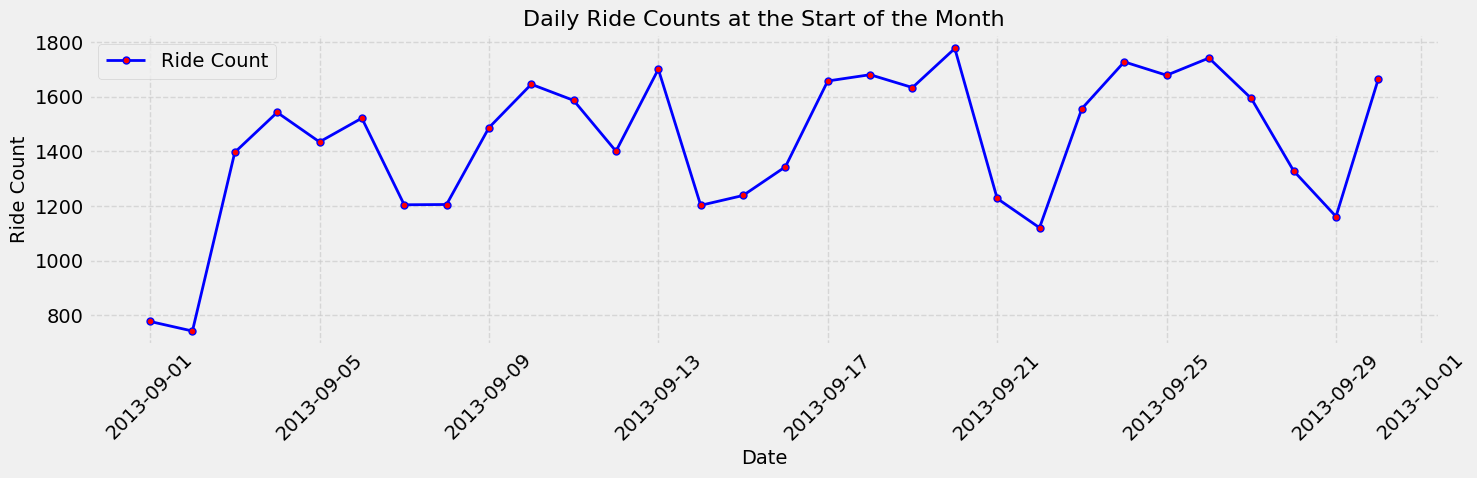

In [20]:
# Line chart showing rides per day at the start of the month
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(day_counts, marker='o', linestyle='-', color='b', linewidth=2, markersize=5, markerfacecolor='red')

# Adding titles and labels
plt.title('Daily Ride Counts at the Start of the Month', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Ride Count', fontsize=14)

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend(['Ride Count'], loc='upper left')

# Display the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

# 05 Decompose the data’s components.
Analyze the results from the plot in a markdown cell.

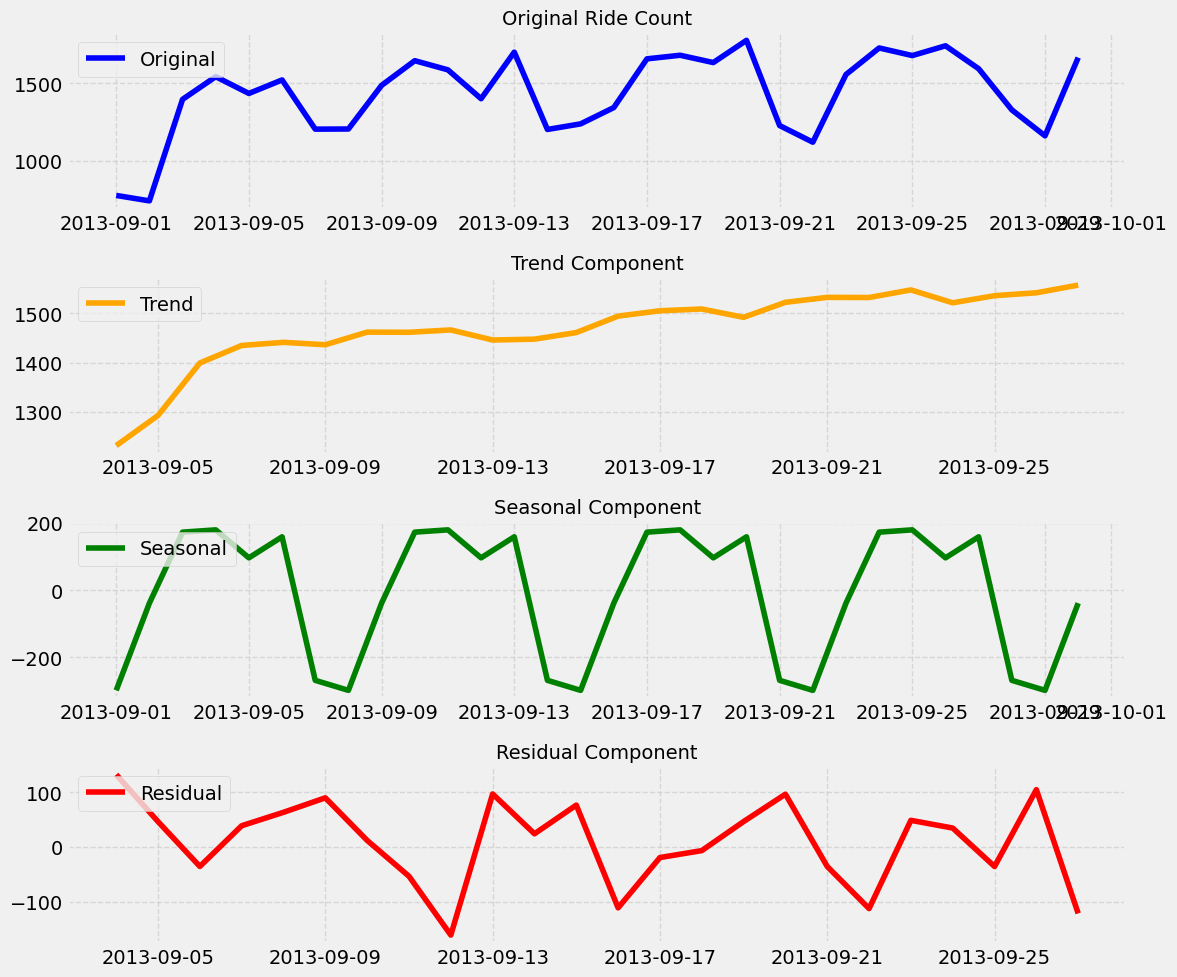

In [21]:
# Specify the seasonal period (7 for weekly seasonality)
period = 7

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(outcome_1['ride_count'], model='additive', period=period)

# Plot the decomposed components
plt.figure(figsize=(12, 10), dpi=100)

# Original data
plt.subplot(411)
plt.plot(outcome_1['ride_count'], label='Original', color='blue')
plt.title('Original Ride Count', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Trend component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend Component', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Residual component
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residual Component', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


Analysis of Seasonal Decomposition Results
The seasonal decomposition plot breaks down the time series data of ride counts into its constituent components: Original, Trend, Seasonal, and Residual. Here are the observations and insights derived from the plot:

Original Ride Count:

The original time series shows the daily ride counts. There is noticeable variability in the ride counts over time, with peaks and troughs occurring throughout the period.
There is a visible pattern where ride counts tend to increase and decrease periodically, which indicates some level of seasonality.
Trend Component:

The trend component represents the long-term movement in the data, smoothing out the short-term fluctuations.
The trend shows a gradual increase in ride counts over the month, suggesting a general upward trend in the number of rides. This could be due to increasing popularity of the service, better weather conditions, or other factors.
Around the middle of the month, the trend stabilizes, indicating a period of steady usage before a slight increase towards the end of the month.
Seasonal Component:

The seasonal component captures the repeating short-term cycle in the data.
There is a clear weekly pattern, with ride counts peaking and dropping consistently. This suggests that there are certain days of the week with consistently higher or lower ride counts. For example, weekends might have higher usage compared to weekdays, or vice versa.
Understanding this weekly seasonality can help in planning and resource allocation, such as ensuring more bikes are available on high-demand days.
Residual Component:

The residual component represents the irregular fluctuations that are not captured by the trend or seasonal components. These are the random variations in the data.
The residuals fluctuate around zero, indicating that most of the variability in the ride counts is explained by the trend and seasonal components.
Some spikes in the residuals suggest occasional anomalies or unexpected events that caused a significant deviation from the expected ride counts. These could be due to external factors like special events, weather changes, or service disruptions.

# 06 Conduct a Dickey-Fuller test to check for stationarity.
Interpret the results in a markdown cell and reference your null hypothesis.

In [22]:
# Import the adfuller() function from statsmodels
from statsmodels.tsa.stattools import adfuller 

# Define the Dickey-Fuller test function
def dickey_fuller(timeseries):
    """
    Perform the Dickey-Fuller test to check for stationarity of the time series.
    
    Parameters:
    timeseries (pd.Series): The time series data to be tested.
    
    Returns:
    None
    """
    print('Dickey-Fuller Stationarity Test:')
    
    # Run the Dickey-Fuller test
    test = adfuller(timeseries, autolag='AIC')
    
    # Create a Series to hold the test results
    result = pd.Series(test[0:4], 
                       index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    
    # Add the critical values to the results
    for key, value in test[4].items():
        result[f'Critical Value ({key})'] = value
    
    # Print the test results
    print(result)

# Apply the Dickey-Fuller test function to the 'ride_count' time series
dickey_fuller(outcome_1['ride_count'])


Dickey-Fuller Stationarity Test:
Test Statistic                 -3.640922
p-value                         0.005025
Number of Lags Used             6.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


Interpretation of Dickey-Fuller Stationarity Test Results
The Dickey-Fuller Stationarity Test is used to determine whether a time series is stationary, meaning that its properties do not depend on the time at which the series is observed. Here are the results of the test and their interpretation:

Test Statistic: -3.640922
p-value: 0.005025
Number of Lags Used: 6
Number of Observations Used: 23
Critical Values:
1%: -3.752928
5%: -2.998500
10%: -2.638967
Interpretation:
Test Statistic: The test statistic is -3.640922. This value is compared to the critical values at different confidence levels (1%, 5%, and 10%).

p-value: The p-value is 0.005025. A p-value less than 0.05 typically indicates that we can reject the null hypothesis at the 5% significance level.

Critical Values: The critical values are the thresholds below which the null hypothesis can be rejected. The test statistic is more negative than the critical value at the 5% level (-3.640922 < -2.998500) and very close to the 1% level (-3.640922 > -3.752928).

Conclusion:
Based on the results of the Dickey-Fuller Stationarity Test, we observe the following:

The test statistic (-3.640922) is lower than the critical value at the 5% significance level (-2.998500).
The p-value (0.005025) is less than 0.05.
Given these results, we reject the null hypothesis (H0) that "Usage patterns do not significantly vary across different days of the week." This implies that there is significant variation in the usage patterns across different days of the week, indicating that the time series is stationary and that the usage patterns are not consistent over time.

Implications:
Rejecting the null hypothesis suggests that the bike usage patterns do vary significantly across different days of the week. This finding could be used to:

Optimize bike availability and station management on different days of the week.
Tailor marketing campaigns and promotions to target specific days with higher or lower usage.
Further investigate the factors contributing to these variations, such as weather, events, or commuter behavior.

# Task 7 + 8 Is data stationary?

Results from the Dickey-Fuller Test:
Test Statistic: -3.640922
p-value: 0.005025
Critical Values:
1%: -3.752928
5%: -2.998500
10%: -2.638967
Interpretation:
Test Statistic:

The test statistic (-3.640922) is compared against the critical values.
If the test statistic is less than the critical value, we reject the null hypothesis.
p-value:

The p-value (0.005025) is compared against a common significance level, usually 0.05.
If the p-value is less than the significance level, we reject the null hypothesis.
Conclusion:
The test statistic (-3.640922) is lower than the 5% critical value (-2.998500) and is also close to the 1% critical value (-3.752928).
The p-value (0.005025) is less than 0.05.
Given these observations, we reject the null hypothesis that the time series has a unit root. This indicates that the time series is stationary.

Final Answer:
Yes, the data is stationary.

The results of the Dickey-Fuller Stationarity Test indicate that the ride count data is stationary, meaning its statistical properties such as mean, variance, and autocorrelation are constant over time.

# 09 Check your data’s autocorrelations.

<Figure size 1200x600 with 0 Axes>

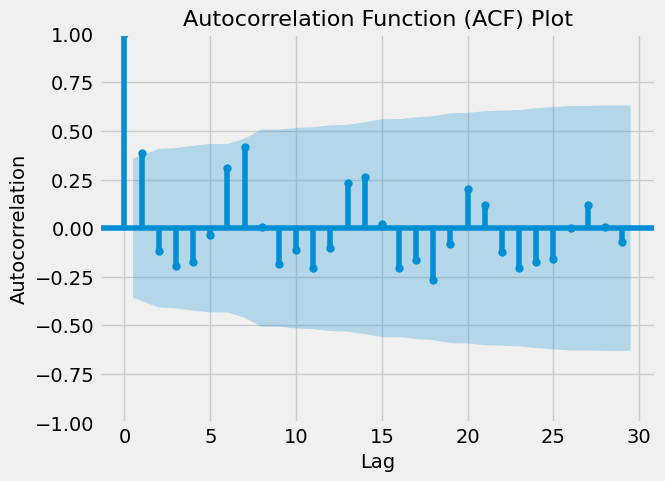

In [26]:
# Extract the 'ride_count' time series
time_series = outcome_1['ride_count']

# Create and customize the ACF plot
plt.figure(figsize=(12, 6))  # Set the figure size
plot_acf(time_series, lags=29)  # Plot the ACF with the specified number of lags
plt.title("Autocorrelation Function (ACF) Plot", fontsize=16)
plt.xlabel("Lag", fontsize=14)
plt.ylabel("Autocorrelation", fontsize=14)
plt.grid(True)  # Add grid lines for better readability

# Display the ACF plot
plt.show()

In [27]:
outcome['date'] = pd.to_datetime(outcome['date'])

In [28]:
citi_e = citi.merge(outcome, left_on='start_date', right_on='date', how='left')

In [29]:
citi_e

,Unnamed: 0,day_of_the_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,birth_year,gender,time_of_day,start_date,end_date,end_hour,start_time,date,ride_count,avg_duration
0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,...,1968.0,Female,Evening & Night,2013-09-09,2013-09-09,18,2013-09-09 18:00:00,2013-09-09,1487,795.318763
1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,...,1983.0,Male,Evening & Night,2013-09-12,2013-09-12,18,2013-09-12 18:00:00,2013-09-12,1401,744.394718
2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,...,1989.0,Male,Evening & Night,2013-09-18,2013-09-18,19,2013-09-18 19:00:00,2013-09-18,1681,757.105294
3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,...,1988.0,Female,Mid-day & Afternoon,2013-09-28,2013-09-28,12,2013-09-28 11:00:00,2013-09-28,1329,816.695260
4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,...,1986.0,Female,Evening & Night,2013-09-27,2013-09-27,22,2013-09-27 22:00:00,2013-09-27,1594,772.560853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42988,42988,Sat,15,435,W 21 St & 6 Ave,40.741740,-73.994156,448,W 37 St & 10 Ave,40.756604,...,1973.0,Male,Mid-day & Afternoon,2013-09-28,2013-09-28,15,2013-09-28 15:00:00,2013-09-28,1329,816.695260
42989,42989,Sun,16,224,Spruce St & Nassau St,40.711464,-74.005524,301,E 2 St & Avenue B,40.722174,...,1975.0,Male,Evening & Night,2013-09-01,2013-09-01,16,2013-09-01 16:00:00,2013-09-01,778,835.948586
42990,42990,Sat,17,261,Johnson St & Gold St,40.694749,-73.983625,151,Cleveland Pl & Spring St,40.721816,...,1970.0,Female,Evening & Night,2013-09-14,2013-09-14,17,2013-09-14 17:00:00,2013-09-14,1203,788.970906
42991,42991,Sat,18,402,Broadway & E 22 St,40.740343,-73.989551,524,W 43 St & 6 Ave,40.755273,...,1961.0,Female,Evening & Night,2013-09-07,2013-09-07,18,2013-09-07 18:00:00,2013-09-07,1205,828.083817


In [30]:
# Exporting new dataset

citi_e.to_csv(os.path.join(path, '02 Data','Prepared Data', 'citi_e.csv')) 